# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [1]:
#import libraries
#Tells Beautifulsoup and requests where data is gotten from.(websites, computer, info about computer)

import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib as plt

In [2]:
#connect to airline website to scrape data on reviews
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [4]:
# Create a DataFrame #df = pd.DataFrame(data)
df = pd.DataFrame()
df["reviews"] = reviews
df.head(5)

,reviews
0,✅ Trip Verified | Our BA flight from Porto t...
1,✅ Trip Verified | The customer services (call ...
2,✅ Trip Verified | I am a frequent flyer with...
3,Not Verified | Flew with BA to Punta Cana. To...
4,✅ Trip Verified | They downgraded me from bu...


In [5]:
import os

# Define the directory path where you want to save the CSV file
directory_path = '/Users/yummy/Desktop/Forage BA' 

# Ensure the directory exists, create it if it doesn't
if not os.path.exists(directory_path):
    os.makedirs(directory_path)

# Specify the full file path, including the directory and file name
file_path = os.path.join(directory_path, 'BA_reviews.csv')

# save the DataFrame to the CSV file
df.to_csv(file_path)

# Verify that the file has been saved
if os.path.exists(file_path):
    print(f"File saved successfully at: {file_path}")
else:
    print(f"File was not saved at: {file_path}")

File saved successfully at: /Users/yummy/Desktop/Data/BA_reviews.csv


The loops above collected 1000 reviews by iterating through the paginated pages on the website. 
To collect more data, increase the number of pages!

Next: Data cleaning to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

In [6]:
df.head(5)

,reviews
0,✅ Trip Verified | Our BA flight from Porto t...
1,✅ Trip Verified | The customer services (call ...
2,✅ Trip Verified | I am a frequent flyer with...
3,Not Verified | Flew with BA to Punta Cana. To...
4,✅ Trip Verified | They downgraded me from bu...


In [7]:
# Remove "Trip Verified" and any leading or trailing whitespace from every row in reviews column
df["reviews"] = df["reviews"].str.replace('✅ ', '').str.strip()
df.head()

,reviews
0,Trip Verified | Our BA flight from Porto to ...
1,Trip Verified | The customer services (call ce...
2,Trip Verified | I am a frequent flyer with B...
3,Not Verified | Flew with BA to Punta Cana. To...
4,Trip Verified | They downgraded me from busi...


In [9]:
# Split the text into relevant columns based on delimiters "|"
df[['flight_details', 'review']] = df["reviews"].str.split('|', 1, expand=True)
df.head()

/var/folders/fn/mrxtgprj4hn57svg56mvgpdr0000gn/T/ipykernel_2432/3809760528.py:2: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  df[['flight_details', 'review']] = df["reviews"].str.split('|', 1, expand=True)


,reviews,flight_details,review
0,Trip Verified | Our BA flight from Porto to ...,Trip Verified,Our BA flight from Porto to London Heathrow...
1,Trip Verified | The customer services (call ce...,Trip Verified,The customer services (call centres etc) are ...
2,Trip Verified | I am a frequent flyer with B...,Trip Verified,I am a frequent flyer with BA and have been...
3,Not Verified | Flew with BA to Punta Cana. To...,Not Verified,Flew with BA to Punta Cana. Took the trouble...
4,Trip Verified | They downgraded me from busi...,Trip Verified,They downgraded me from business to premium...


In [10]:
# Drop the columns related to "trip verification"
df_cleaned = df.drop(columns=["reviews", "flight_details"])

# Display the first few rows of the cleaned dataset
df_cleaned.head()


,review
0,Our BA flight from Porto to London Heathrow...
1,The customer services (call centres etc) are ...
2,I am a frequent flyer with BA and have been...
3,Flew with BA to Punta Cana. Took the trouble...
4,They downgraded me from business to premium...


In [11]:
# Check for missing values in the cleaned dataset
missing_values = df_cleaned.isnull().sum()
missing_values

review    0
dtype: int64

In [12]:
# Calculate basic statistics about the reviews
num_reviews = df_cleaned.shape[0]
avg_review_length = df_cleaned['review'].apply(len).mean()

num_reviews, avg_review_length

(1000, 805.003)

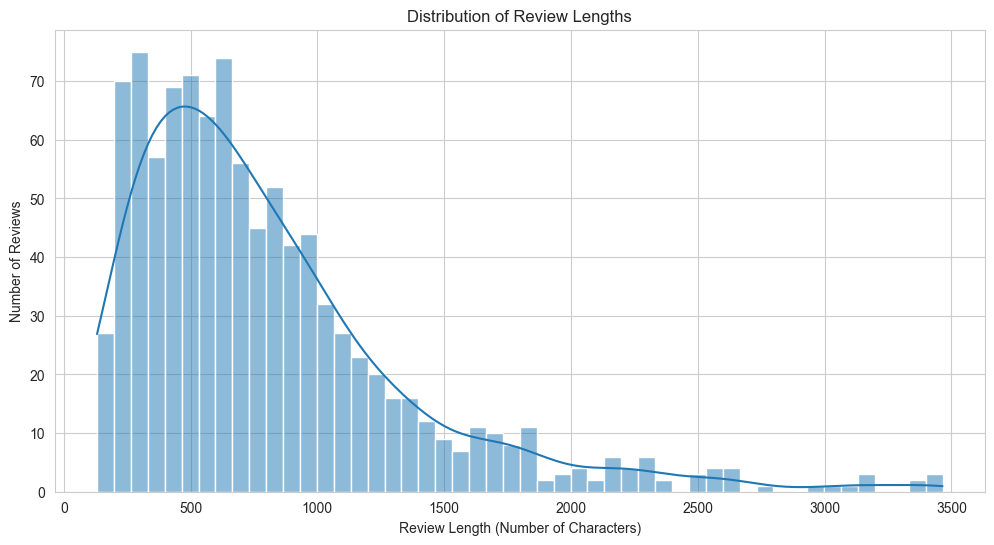

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for seaborn
sns.set_style("whitegrid")

# Plot the distribution of review lengths
plt.figure(figsize=(12, 6))
sns.histplot(df_cleaned['review'].apply(len), bins=50, kde=True)
plt.title("Distribution of Review Lengths")
plt.xlabel("Review Length (Number of Characters)")
plt.ylabel("Number of Reviews")
plt.show()


In [14]:
df_cleaned.head()

,review
0,Our BA flight from Porto to London Heathrow...
1,The customer services (call centres etc) are ...
2,I am a frequent flyer with BA and have been...
3,Flew with BA to Punta Cana. Took the trouble...
4,They downgraded me from business to premium...


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/yummy/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to /Users/yummy/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


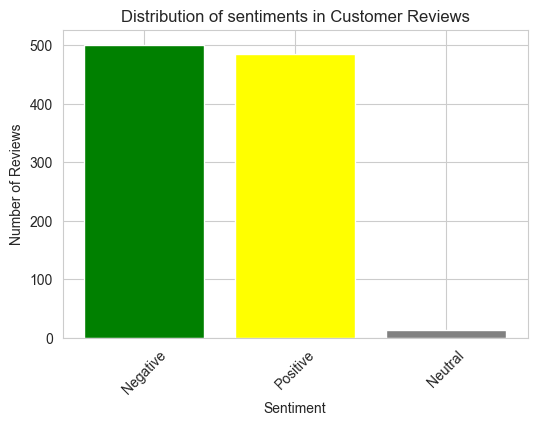

In [17]:
# Import necessary libraries
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.tokenize import word_tokenize
nltk.download('vader_lexicon')
nltk.download('punkt')


# Step 2: Data Preprocessing
# Clean and preprocess the text 
# Initialize the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()
#sid = SentimentIntensityAnalyzer()

# Function to get sentiment scores and labels
def get_sentiment(text):
    sentiment = analyzer.polarity_scores(text)
    compound_score = sentiment['compound']
    if compound_score >= 0.05:
        return 'Positive'
    elif compound_score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Apply sentiment analysis and store the results in new columns
df['sentiment_scores'] = df['review'].apply(get_sentiment)

# Step 3: Data Visualization
# Visualize the sentiment distribution in the dataset
sentiment_counts = df['sentiment_scores'].value_counts()

# Create a bar chart
plt.figure(figsize=(6, 4))
plt.bar(sentiment_counts.index, sentiment_counts.values, color=['green', 'yellow', 'gray'])
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.title('Distribution of sentiments in Customer Reviews')
plt.xticks(rotation=45)
plt.show()

# Step 4: Interpret the Results
# Analyze the insights obtained from the data visualization
# For instance, you can observe the distribution of sentiment in customer reviews and draw conclusions about customer satisfaction.


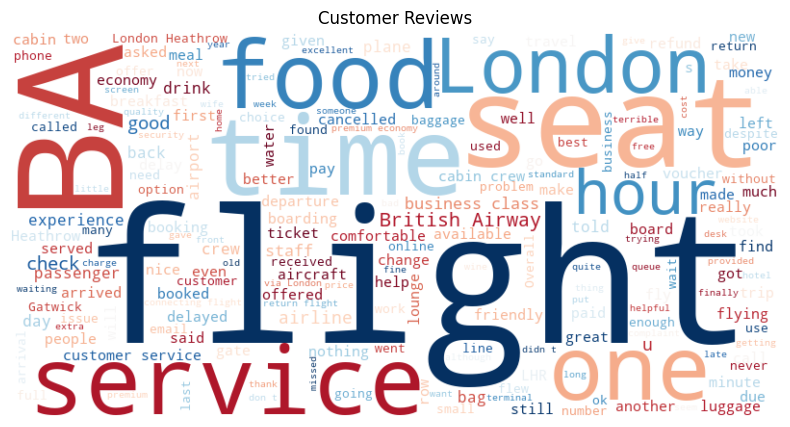

In [25]:
from wordcloud import WordCloud

# Combine all the reviews into a single text
combined_text = " ".join(review for review in df['review'])

# Create a Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white',
                      colormap='RdBu', contour_color='white').generate(combined_text)

# Display the Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Customer Reviews')
plt.show()


In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Initialize the SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

# Function to get sentiment labels
def get_sentiment_label(text):
    sentiment = sid.polarity_scores(text)
    compound_score = sentiment['compound']
    if compound_score >= 0.05:
        return 'Positive'
    elif compound_score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Apply sentiment analysis and store results in a new column
df['sentiment'] = df_cleaned['review'].apply(get_sentiment_label)

# Display the updated DataFrame
print(df.head())


In [ ]:
# Perform further data extraction and cleaning e.g. extracting flight details, delays, costs, and reasons for delays

# Example: Extracting flight details
df['from'] = df['flight_details'].str.extract(r'from\s(.*?)\sto', flags=re.IGNORECASE)
df['to'] = df['flight_details'].str.extract(r'to\s(.*?),', flags=re.IGNORECASE)

In [ ]:
# Example: Extracting costs
df['cab_fare'] = df['complaint'].str.extract(r'cab fare was roughly \$([\d,]+)', flags=re.IGNORECASE)

In [ ]:
# Example: Extracting reasons for delays
df['delay_reason'] = df['complaint'].str.extract(r'delay was roughly an hour, but it was enough to make(.*?)a challenge', flags=re.IGNORECASE)

In [ ]:
# Display the cleaned DataFrame
print(df_cleaned)